In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from urllib.request import urlretrieve

## Real Estate Evaluation

### Downloading the Data

In [4]:
url_realEstate = "https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx"
urlretrieve(url_realEstate, "realEstateVal.xlsx")

('realEstateVal.xlsx', <http.client.HTTPMessage at 0x274ef662c70>)

In [5]:
realEstateVal = pd.read_excel("realEstateVal.xlsx")

In [7]:
realEstateVal.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [15]:
## Renaming Columns
colNames = ['No', 'TransactionDate', 'HouseAge', 'Dist to Nearest MRT Station',
            'No of Convenience Stores', 'Latitude', 'Longitude', 'House Price of Unit Area']
realEstateVal.columns = colNames

# deleting 'No' column since is not need
del realEstateVal['No']

In [16]:
realEstateVal.head()

,TransactionDate,HouseAge,Dist to Nearest MRT Station,No of Convenience Stores,Latitude,Longitude,House Price of Unit Area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.


The inputs are as follows

- TransactionDate = the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- HouseAge = the house age (unit: year)
- Dist to Nearest MRT Station = the distance to the nearest MRT (Mass Rapid Transit) station (unit: meter)
- No of Convenience Stores = the number of convenience stores in the living circle on foot (integer)
- Latitude = the geographic coordinate, latitude. (unit: degree)
- Longitude = the geographic coordinate, longitude. (unit: degree)

The output is as follow
- House Price of Unit Area = house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [17]:
realEstateVal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionDate              414 non-null    float64
 1   HouseAge                     414 non-null    float64
 2   Dist to Nearest MRT Station  414 non-null    float64
 3   No of Convenience Stores     414 non-null    int64  
 4   Latitude                     414 non-null    float64
 5   Longitude                    414 non-null    float64
 6   House Price of Unit Area     414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [18]:
realEstateVal.describe()

,TransactionDate,HouseAge,Dist to Nearest MRT Station,No of Convenience Stores,Latitude,Longitude,House Price of Unit Area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [22]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

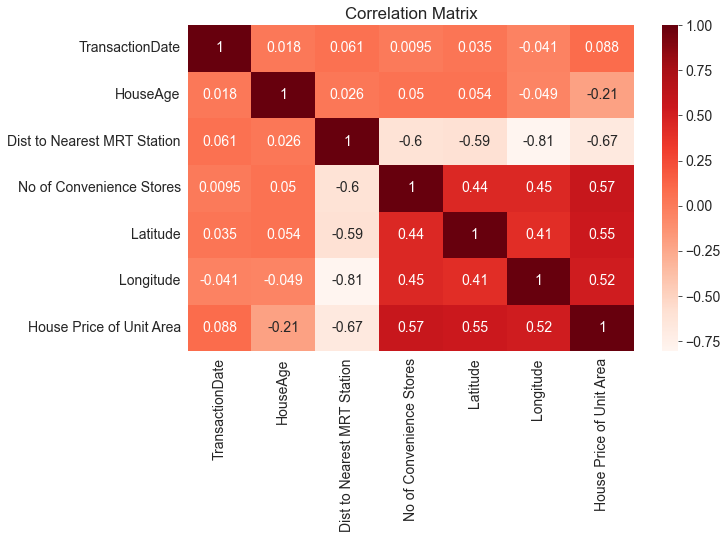

In [29]:
sns.heatmap(realEstateVal.corr(), cmap='Reds', annot=True);
plt.title("Correlation Matrix");

### Model Creation

In [35]:
# creating input and targets
input_cols = ['TransactionDate', 'HouseAge', 'Dist to Nearest MRT Station', 
              'No of Convenience Stores', 'Latitude', 'Longitude']
inputs = realEstateVal[input_cols]
target = realEstateVal['House Price of Unit Area']

# create and train model
model = LinearRegression()
model.fit(inputs, target)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate loss 
rmse = mean_squared_error(target, predictions, squared=False)
rmse

8.782312975361043

In [65]:
def realEstateVal():
      print('''
            Time to predict the evaluation of real estates in Sindian district, Taiwan.
            ''')
      # collecting arguments
      year = int(input("Enter the year of Transaction: "))
      month = int(input("Enter the month number of transaction (Ex. March = 2): "))
      transactionDate = year + month/12
      houseAge = float(input('Enter House age in years: '))
      distMRT = float(input("What is the distance to the nearest MRT Station (meters)? "))
      noOfStores = int(input("How many stores are around the property? "))
      latitude = float(input("What is its latitude? "))
      longitude = float(input("What is its longitude? "))
      
      # generating prediction
      predictors = [transactionDate, houseAge, distMRT, noOfStores, latitude, longitude]
      model = fitModel()
      prediction = model.predict([predictors])
      print()
      print(f'the value of the house is {prediction[0]:.2f} per unit area (10000 New Taiwan Dollar/Ping)')

def fitModel():
      import pandas as pd
      import numpy as np
      from sklearn.linear_model import LinearRegression
      realEstateVal = pd.read_excel("realEstateVal.xlsx")
      
      ## Renaming Columns
      colNames = ['No', 'TransactionDate', 'HouseAge', 'Dist to Nearest MRT Station',
                  'No of Convenience Stores', 'Latitude', 'Longitude', 'House Price of Unit Area']
      realEstateVal.columns = colNames
      
      # deleting 'No' column since is not needed
      del realEstateVal['No']
      
      # creating input and targets
      input_cols = ['TransactionDate', 'HouseAge', 'Dist to Nearest MRT Station', 
                    'No of Convenience Stores', 'Latitude', 'Longitude']
      inputs = realEstateVal[input_cols]
      target = realEstateVal['House Price of Unit Area']
      
      # create and fit model
      model = LinearRegression()
      model.fit(inputs, target)
      
      return model
      

In [64]:
realEstateVal
pd.read

<function __main__.realEstateVal()>

## Medical Charges
### Downloading Data

In [64]:
url_medical = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
urlretrieve(url_medical, "medicalcharges.csv")

('medicalcharges.csv', <http.client.HTTPMessage at 0x229642ff0a0>)

In [65]:
medicalCharges = pd.read_csv("medicalcharges.csv")

In [66]:
medicalCharges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
medicalCharges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
print("Unique Sex values:")
print(medicalCharges['sex'].unique(), '\n')
print('Unique smoker values:')
print(medicalCharges.smoker.unique(), '\n')
print('Unique region values:')
print(medicalCharges.region.unique())

Unique Sex values:
['female' 'male'] 

Unique smoker values:
['yes' 'no'] 

Unique region values:
['southwest' 'southeast' 'northwest' 'northeast']


Converting 'Sex' and 'Smoker' columns into 1s and 0s

In [78]:
sex_codes = {'female':0,'male':1}
smoker_codes = {'yes':1, 'no':0}

medicalCharges['sex_code'] = medicalCharges.sex.map(sex_codes)
medicalCharges['smoker_code'] = medicalCharges.smoker.map(smoker_codes)

medicalCharges.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


One Hot Encoding the Region column

In [83]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(medicalCharges[['region']])
one_hot = enc.transform(medicalCharges[['region']]).toarray()
medicalCharges[enc.categories_[0]] = one_hot
medicalCharges.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0


### Model Creation

In [ ]:
# Create inputs and target
input_cols = ['age', 'bmi', 'children', 'smoker', 'sex_code','smoker_code', 
              'northeast', 'northwest', 'southeast','southwest']
inputs = medicalCharges[input_cols]
target = medicalCharges.charges

# create and train the model
model = LinearRegression()
model.fit(inputs, target)

## StartUp Profit Prediction

### Downloading the Data

In [94]:
url_startup = "https://gist.githubusercontent.com/GaneshSparkz/b5662effbdae8746f7f7d8ed70c42b2d/raw/faf8b1a0d58e251f48a647d3881e7a960c3f0925/50_Startups.csv"
urlretrieve(url_startup, "50_startups.csv")

('50_startups.csv', <http.client.HTTPMessage at 0x22963ef9b50>)

In [95]:
startUp = pd.read_csv("50_startups.csv")
startUp.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [97]:
startUp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [98]:
startUp.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

One Hot Encoding the State column

In [99]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(startUp[['State']])
one_hot = enc.transform(startUp[['State']]).toarray()
startUp[enc.categories_[0]] = one_hot
startUp.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0


In [100]:
startUp.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

### Model Creation

In [ ]:
# create inputs and target
input_cols = ['R&D Spend', 'Administration', 'Marketing Spend',
              'California', 'Florida', 'New York']
inputs = startUp[input_cols]
target = startUp['Profit']

# create and train the model
model = LinearRegression()
model.fit(inputs, target)

In [31]:
print("-----"*10)
print("\t\tPrediction App")
print("-----"*10)

# printing options
print('''
Choose your option. Remember to dowonload data
 [1]   Download the required data
 [2]   Predict Real Estate values of properties in Taiwan
 [3]   Predict Medical Charges of patients at Bowen hospital
 [4]   Predict profit of startups in the US 
''')

i = 1
while i == 1:
      userOpt = int(input("What is your option? "))
      if userOpt == 1:
            import datadownload
            print("Downloading required data")
            datadownload.downloadData()
      elif userOpt == 2:
            import predictRealEst
            predictRealEst.fitModel()
            predictRealEst.realEstateVal()
            
            cont = input("Will you like to continue? [Yes/No]")
            if cont.lower() == 'yes':
                  i = 1
            else:
                  i = 0
      elif userOpt == 3:
            import predictMedical
            predictMedical.fitModel()
            predictMedical.medicalChargesCalc()
            
            cont = input("Will you like to continue? [Yes/No]")
            if cont.lower() == 'yes':
                  i = 1
            else:
                  i = 0
      elif userOpt == 4:
            import predictStartUps
            predictStartUps.fitModel()
            predictStartUps.startUpEval()
            
            cont = input("Will you like to continue? [Yes/No]")
            if cont.lower() == 'yes':
                  i = 1
            else:
                  i = 0
      else:
            print("Wrong option entered")
            
      


--------------------------------------------------
		Prediction App
--------------------------------------------------

Choose your option. Remember to dowonload data
 [1]   Download the required data
 [2]   Predict Real Estate values of properties in Taiwan
 [3]   Predict Medical Charges of patients at Bowen hospital
 [4]   Predict profit of startups in the US 



ValueError: invalid literal for int() with base 10: ''

In [26]:
import predictRealEst

NameError: name 'fitModel' is not defined